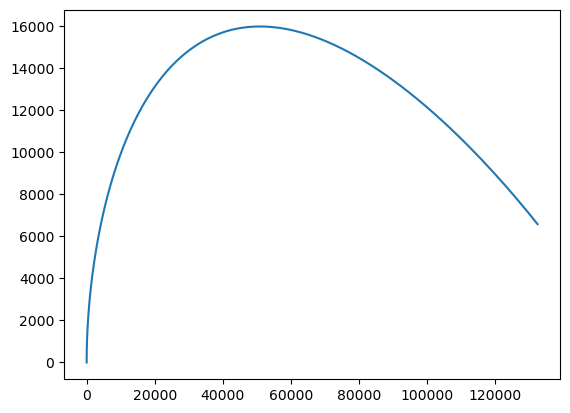

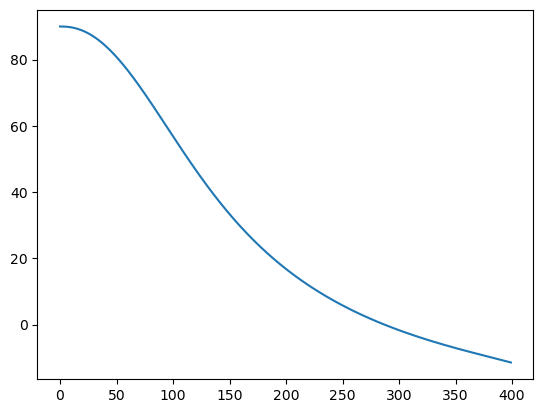

In [26]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import math

deg_to_rad = math.pi / 180.0

G = 6.67408e-11    #  m^3 kg^-1 s^-2
mbody = 5.9724e24  # kg
mu = G * mbody
g0 = 9.80665       # m/s^2
r0 = 6371 * 1000   # m
isp_sea = 282      # s
isp_vac = 311      # s
gamma0 = 89.99970 * deg_to_rad
v0 = 1             # m/s
phi0 = 0
m1 = 433100        # kg
m2 = 111500        # kg
m3 = 1700          # kg
mp = 5000          # kg
m0 = m1+m2+m3+mp
massFlowRate = 2750          # kg/s
A = 3.66 * 3.66 * math.pi
dragCoef = 0.2

def gravity(r):
    return mu / r / r

def angVel(r, v, gamma):
    return v / r * np.cos(gamma)

def density(r):
    return 1.2250 * np.exp(-g0 * (r - r0) / 83246.8)

def drag(r, v):
    return 0.5 * density(r) * v * v * A * dragCoef

def isp(r):
    return isp_vac + (isp_sea - isp_vac) * density(r)/density(r0)

def thrust(isp):
    return g0 * isp * dm

def model(t, z):
    r, v, m, phi, gamma = z

    dr = v * math.sin(gamma)
    dv = - gravity(r) * np.sin(gamma) + (thrust(isp(r)) - drag(r, v)) / m
    dm = - massFlowRate
    dphi = angVel(r, v, gamma)
    dgamma = angVel(r, v, gamma) - gravity(r) * np.cos(gamma) / v

    return [dr, dv, dm, dphi, dgamma]

z0 = [r0, v0, m0, phi0, gamma0]
sol = solve_ivp(model, [0, 150], z0, dense_output=True,  rtol = 1e-8)

z = sol.sol(np.linspace(0, 150, 400))

plt.plot((z.T[:, 3] - phi0) * r0, z.T[:, 0] - r0)
plt.show()
plt.plot(z.T[:, 4] / deg_to_rad)
plt.show()
